<a href="https://colab.research.google.com/github/yamin03/hakwon0309/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EB%AA%A8%EB%8D%B8_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

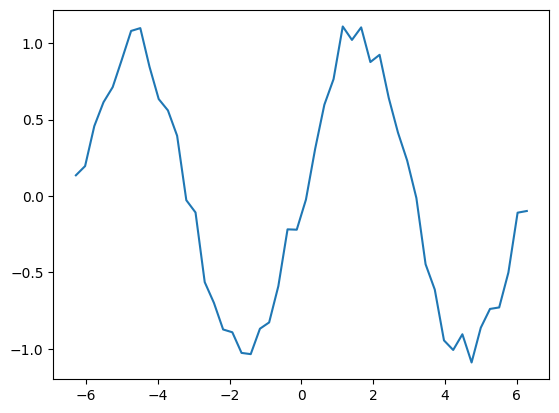

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi) #-2파이에서 2파이 까지
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data)) #sin()함수에 난수로 노이즈를 더한다

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10 #시계열의 수
n_sample = len(x_data)-n_rnn #샘플 수
x = np.zeros((n_sample, n_rnn)) #입력
t = np.zeros((n_sample, n_rnn))
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]

In [ ]:
t[i] = sin_data[i+1:i+n_rnn+1] #시계열을 입력보다도 1개 뒤로 비켜놓는다

x = x.reshape(n_sample, n_rnn, 1) #keras에서의 RNN에서는 입력을 (심플 수, 시계열의 수, 입력층의 뉴런 수)로 한다.
print(x.shape)
t=t.reshape(n_sample, n_rnn, 1)
print(t.shape)

(40, 10, 1)
(40, 10, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

n_in = 1 #입력층의 뉴런 수
n_mid = 10 #중간층의 누런 수
n_out = 1 #출력층의 누런 수

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True)) # 간단한 rnn층
model.add(Dense(n_out, activation="linear")) #  전결합층
model.compile(loss="mean_squared_error", optimizer="sgd")

print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f5c71b21250>>


In [ ]:
history = model.fit(x, t, epochs=20, batch_size=8, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 1s 68ms/step - loss: 0.4344 - val_loss: 0.4961
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1519 - val_loss: 0.2700
Epoch 3/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0744 - val_loss: 0.1983
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0566 - val_loss: 0.1703
Epoch 5/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0504 - val_loss: 0.1598
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0473 - val_loss: 0.1538
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0449 - val_loss: 0.1505
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0428 - val_loss: 0.1485
Epoch 9/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0410 - val_loss: 0.1471
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0391 - val_loss: 0.1457
Epoch 11/20
5/5 [==============

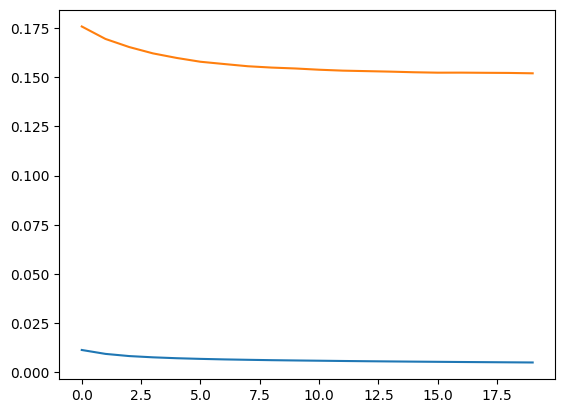

In [ ]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

1/1 [==============================] - 0s 16ms/step


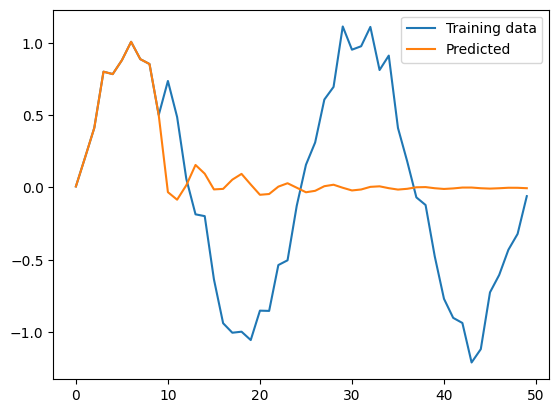

In [ ]:
predicted = x[0].reshape(-1) #처음의 입력. reshape(-1)으로 1차원의 벡터로 한다

for i in range(0, n_sample):
  y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1)) #최근 데이터를 사용해서 예측을 실시한다
  predicted = np.append(predicted, y[0][n_rnn-1][0]) #출력의 최후 결과를 predicted에 추가한다

plt.plot(np.arange(len(sin_data)), sin_data, label="Training data") #훈련에 사용한 데이터
plt.plot(np.arange(len(predicted)), predicted, label="Predicted") #예측결과
plt.legend()
plt.show()

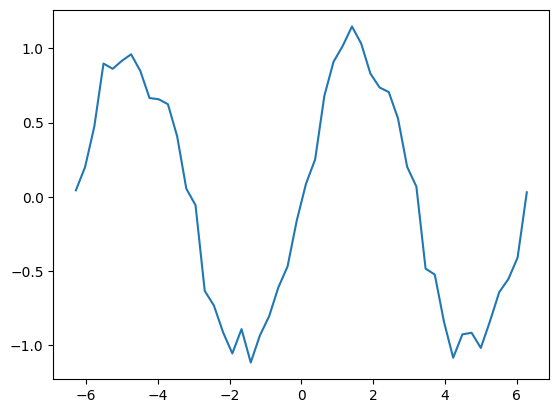

(40, 10, 1)
(40, 10, 1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi) #-2파이에서 2파이 까지
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data)) #sin()함수에 난수로 노이즈를 더한다

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10 #시계열의 수
n_sample = len(x_data)-n_rnn #샘플 수
x = np.zeros((n_sample, n_rnn)) #입력
t = np.zeros((n_sample, n_rnn))
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1] #시계열을 입력보다도 1개 뒤로 비켜놓는다

x = x.reshape(n_sample, n_rnn, 1) #샘플 수, 시계열의 수, 입력층의 뉴런 수
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1) #이번은 입력과 같은 형태
print(t.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
n_in = 1
n_mid = 20
n_out = 1

#비교를 위한 통상의 RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_rnn.add(Dense(n_out, activation="linear"))
model_rnn.compile(loss="mean_squared_error", optimizer="sgd")

print(model_rnn.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f5c808424f0>>


In [ ]:
# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_lstm.add(Dense(n_out, activation="linear"))
model_lstm.compile(loss="mean_squared_error", optimizer="sgd")
print(model_lstm.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 20)            1760      
                                                                 
 dense_4 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import time

epochs = 500
batch_size = 8 #배치크기

#일반적인 RNN
start_time = time.time()
history_rnn = model_rnn.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("학습시간 --일반적인RNN--:", time.time() - start_time)

#LSTM
start_time = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("학습시간 --LSTM--:", time.time() - start_time)

학습시간 --일반적인RNN--: 5.945297956466675
학습시간 --LSTM--: 8.292036533355713


1/1 [==============================] - 0s 21ms/step


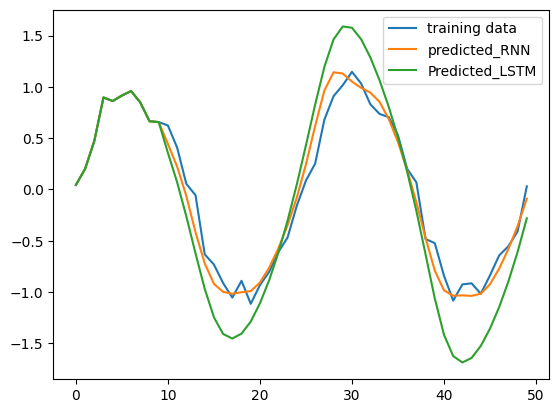

In [ ]:
predicted_rnn = x[0].reshape(-1)
predicted_lstm = x[0].reshape(-1)

for i in range(0, n_sample):
  y_rnn = model_rnn.predict(predicted_rnn[-n_rnn:].reshape(1, n_rnn, 1))
  predicted_rnn = np.append(predicted_rnn, y_rnn[0][n_rnn-1][0])
  y_lstm = model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1, n_rnn, 1))
  predicted_lstm = np.append(predicted_lstm, y_lstm[0][n_rnn-1][0])

plt.plot(np.arange(len(sin_data)), sin_data, label="training data")
plt.plot(np.arange(len(predicted_rnn)), predicted_rnn, label ="predicted_RNN")
plt.plot(np.arange(len(predicted_lstm)), predicted_lstm, label="Predicted_LSTM")
plt.legend()
plt.show()